# Loading Digit image dataset
The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image.

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

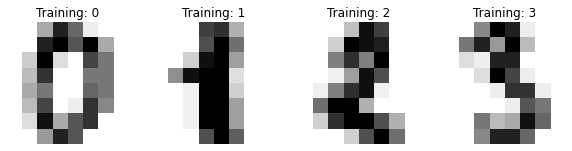

In [2]:
# First four data
import matplotlib.pyplot as plt

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [3]:
# main_data = digits['data']
# targets = digits['target']
print(digits['data'])

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [5]:
print(digits.images.reshape((len(digits.images), -1)))

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


# SVC

In [7]:
from sklearn import svm
from sklearn.model_selection import train_test_split

# # flatten the images
# n_samples = len(digits.images)
# data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

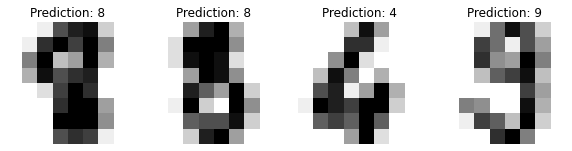

In [9]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted)

0.9688542825361512

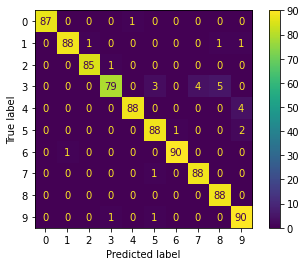

In [22]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(cm,display_labels=clf.classes_)
disp.plot()
plt.show()


# DecisionTreeClassifier

0.7575083426028921


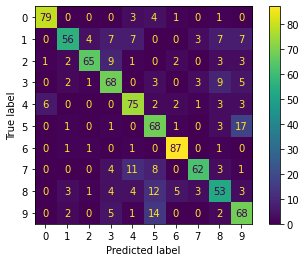

In [24]:
# import the Classifier
from sklearn.tree import DecisionTreeClassifier
# Instanciate Model
# we can also use criterion = 'entropy' both lead us to nearly same 
# result
dt = DecisionTreeClassifier(criterion = 'gini') 

# Learn the digits on the train subset
dt.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = dt.predict(X_test)
print(accuracy_score(y_test, predicted))
cm = metrics.confusion_matrix(y_test, predicted, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(cm,display_labels=clf.classes_)
disp.plot()
plt.show()

# RandomForestClassifier

0.9365962180200222


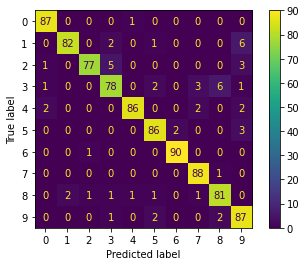

In [26]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators hyperparameters( default 100 )
rc = RandomForestClassifier(n_estimators = 150)
# Training Data = 1500 , Validation data = 297
rc.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = rc.predict(X_test)
print(accuracy_score(y_test, predicted))
cm = metrics.confusion_matrix(y_test, predicted, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(cm,display_labels=clf.classes_)
disp.plot()
plt.show()